Name: Albright Maduka Ifechukwude

Student Id: 9053136

Course code: PROG8431

Project Context: Nitrogen vs Soil pH (Canada Agriculture)

Course: Data Analysis Mathematics and Algorithm Model

1. Setup & Config

In [75]:
from __future__ import annotations
import re, sys, platform, os
from dataclasses import dataclass, field
from typing import Optional, Tuple, Iterable, List, Dict

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

try:
    from IPython.display import display
except Exception:
    display = print

# ---------- 0) Setup / environment ----------
print({
    "python": sys.version.split()[0],
    "platform": f"{platform.system()} {platform.release()}",
    "pandas": pd.__version__,
    "numpy": np.__version__,
    "matplotlib": mpl.__version__,
})

{'python': '3.13.9', 'platform': 'Windows 11', 'pandas': '2.3.3', 'numpy': '2.3.4', 'matplotlib': '3.10.7'}


2. Data Path

In [76]:
# --- constants & paths ---
DATA_SOURCE = os.path.join("Data", "Soil Nutrients.csv")  # use os.path.join for cross-platform compatibility
SAVE_DIR = "artifacts"
os.makedirs(SAVE_DIR, exist_ok=True)

# Verify the file exists
if not os.path.exists(DATA_SOURCE):
    print(f"Warning: {DATA_SOURCE} not found!")
else:
    print(f"Found data file: {DATA_SOURCE}")

Found data file: Data\Soil Nutrients.csv


3. Object-oriented; cleaning, standardization, K-Means, EDA, summaries 

Loaded: Data/Soil Nutrients.csv | rows=15400 | cols=['Name', 'Fertility', 'Photoperiod', 'Temperature', 'Rainfall', 'pH', 'Light_Hours', 'Light_Intensity', 'Rh', 'Nitrogen', 'Phosphorus', 'Potassium', 'Yield', 'Category_pH', 'Soil_Type', 'Season', 'N_Ratio', 'P_Ratio', 'K_Ratio']


,Name,Fertility,Photoperiod,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Category_pH,Soil_Type,Season,N_Ratio,P_Ratio,K_Ratio
0,Strawberry,Moderate,Day Neutral,20.887923,747.860765,6.571548,13.091483,533.762876,91.197196,170.800381,118.670058,243.331211,20.369555,low_acidic,Loam,Summer,10.0,10.0,10.0
1,Strawberry,Moderate,Day Neutral,18.062721,711.104329,6.251806,13.063016,505.789101,91.939623,179.290364,121.020244,246.910378,20.402751,low_acidic,Loam,Spring,10.0,10.0,10.0
2,Strawberry,Moderate,Short Day Period,16.776782,774.038247,6.346916,12.945927,512.985617,91.387286,181.440732,116.936806,242.699601,19.158847,low_acidic,Loam,Summer,10.0,10.0,10.0
3,Strawberry,Moderate,Short Day Period,14.281000,665.633506,6.259598,13.318922,484.860067,91.254598,176.165282,122.233153,237.096892,20.265745,low_acidic,Loam,Summer,10.0,10.0,10.0
4,Strawberry,Moderate,Day Neutral,21.444490,806.531455,6.384368,13.312915,512.747307,92.354829,182.935334,126.088234,243.880364,20.397336,low_acidic,Loam,Spring,10.0,10.0,10.0


Cleaned data summary:


,N,Ph
count,14348.000000,14348.000000
mean,130.923783,6.509152
std,36.087225,0.434878
min,41.725552,4.888871
25%,114.792031,6.289842
50%,138.627313,6.489387
75%,154.424232,6.720936
max,199.858890,8.023210


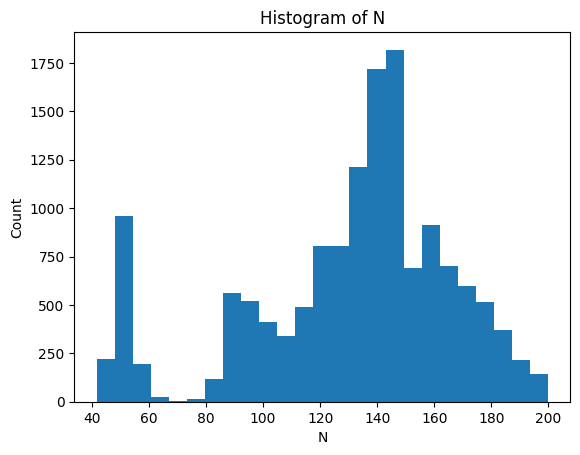

C:\Users\maduk\AppData\Local\Temp\ipykernel_22500\2615183354.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(self.df2[col], labels=[col])


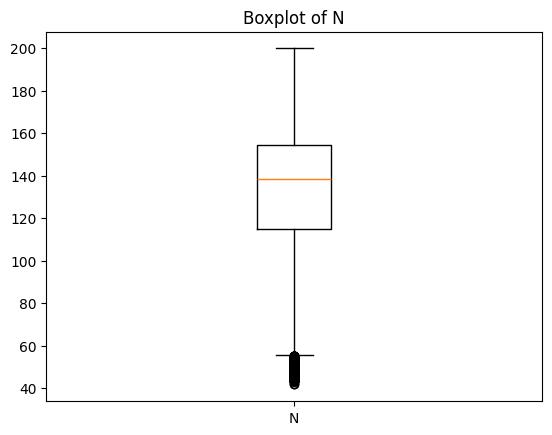

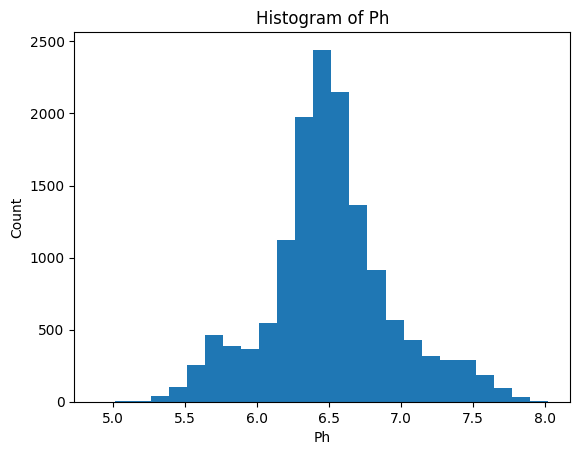

C:\Users\maduk\AppData\Local\Temp\ipykernel_22500\2615183354.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(self.df2[col], labels=[col])


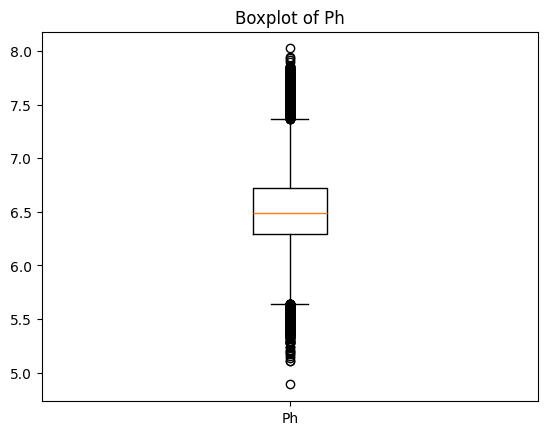

Best k (silhouette): 6


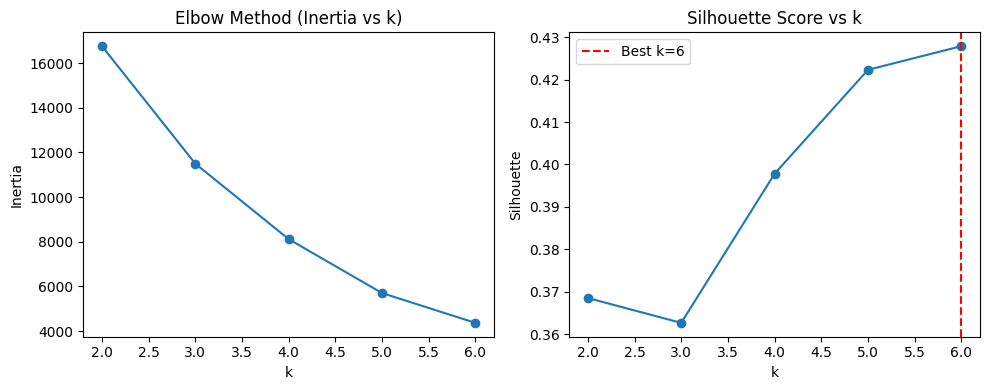

Cluster centers (original units):


,N_center,Ph_center
0,152.020070,6.326306
1,100.746537,6.471238
2,133.311688,6.730542
3,170.185104,5.711608
4,156.404457,7.450661
5,50.829692,6.965430


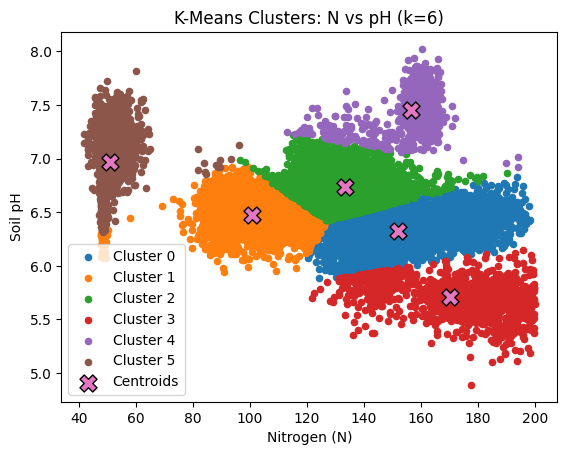

Cluster summary:


,cluster,N_mean,Ph_mean,N_min,N_max,Ph_min,Ph_max,count
0,0,152.025351,6.326775,120.298715,198.174579,5.883160,6.827241,4859
1,1,100.686389,6.470985,47.661961,126.595605,5.940265,6.920384,2588
2,2,133.282231,6.730552,96.438726,190.048065,6.426594,7.219058,3258
3,3,170.112302,5.712255,121.685457,199.858890,4.888871,6.147280,1440
4,4,156.404457,7.450661,112.821660,193.908347,6.917848,8.023210,834
5,5,50.832973,6.966376,41.725552,96.279626,6.319720,7.814507,1369


,cluster,N_mean,Ph_mean,N_min,N_max,Ph_min,Ph_max,count
0,0,152.025351,6.326775,120.298715,198.174579,5.883160,6.827241,4859
1,1,100.686389,6.470985,47.661961,126.595605,5.940265,6.920384,2588
2,2,133.282231,6.730552,96.438726,190.048065,6.426594,7.219058,3258
3,3,170.112302,5.712255,121.685457,199.858890,4.888871,6.147280,1440
4,4,156.404457,7.450661,112.821660,193.908347,6.917848,8.023210,834
5,5,50.832973,6.966376,41.725552,96.279626,6.319720,7.814507,1369


In [74]:
@dataclass
class SoilClusteringProject:
    df: Optional[pd.DataFrame] = None
    csv_path: Optional[str] = None

    # internals
    df2: Optional[pd.DataFrame] = field(default=None, init=False)
    scaler: Optional[StandardScaler] = field(default=None, init=False)
    X_scaled: Optional[np.ndarray] = field(default=None, init=False)
    best_k: Optional[int] = field(default=None, init=False)
    kmeans: Optional[KMeans] = field(default=None, init=False)
    centers_: Optional[np.ndarray] = field(default=None, init=False)  # original units

    # ---- load ----
    def load(self) -> pd.DataFrame:
        if self.df is not None:
            print("Using provided DataFrame.")
            return self.df
        if not self.csv_path:
            raise FileNotFoundError("Please set csv_path (e.g., 'Data/Soil Nutrients.csv').")
        self.df = pd.read_csv(self.csv_path)
        print(f"Loaded: {self.csv_path} | rows={len(self.df)} | cols={list(self.df.columns)}")
        return self.df

    def preview(self, n:int=5) -> pd.DataFrame:
        if self.df is None:
            raise ValueError("Call load() first.")
        display(self.df.head(n))
        return self.df.head(n)

    # ---- cleaning / feature pick (Nitrogen, pH) ----
    @staticmethod
    def _norm(s:str) -> str:
        return re.sub(r"[^a-z0-9]+","", s.lower())

    def _detect_columns(self) -> Tuple[str, str]:
        if self.df is None:
            raise ValueError("Call load() first.")
        cols = list(self.df.columns)
        norm = {c: self._norm(c) for c in cols}
        cand_n  = [c for c in cols if norm[c] in {"n","nitrogen","nrate","nitrogenrate"} or "nitrogen" in norm[c]]
        cand_ph = [c for c in cols if norm[c] == "ph" or "soilph" in norm[c] or norm[c].endswith("ph")]
        if not cand_n or not cand_ph:
            raise KeyError(f"Could not detect N/pH columns. Found: {cols}")
        cand_n.sort(key=lambda s: (len(s), s.lower()))
        cand_ph.sort(key=lambda s: (len(s), s.lower()))
        return cand_n[0], cand_ph[0]

    def clean_and_select(self,
                         n_bounds: Tuple[float,float]=(0,200),
                         ph_bounds: Tuple[float,float]=(2.5,9.5)) -> pd.DataFrame:
        if self.df is None:
            raise ValueError("Call load() first.")
        n_col, ph_col = self._detect_columns()
        df2 = self.df[[n_col, ph_col]].copy()
        df2.columns = ["N","Ph"]

        # numeric coercion
        for c in ["N","Ph"]:
            s = (df2[c].astype(str)
                        .str.replace(",", "", regex=False)
                        .str.replace(r"[^\d\.\-\+eE]+","", regex=True))
            df2[c] = pd.to_numeric(s, errors="coerce")

        # drop NA + bounds
        df2 = df2.dropna(subset=["N","Ph"])
        df2 = df2[df2["N"].between(*n_bounds)]
        df2 = df2[df2["Ph"].between(*ph_bounds)]
        self.df2 = df2.reset_index(drop=True)

        print("Cleaned data summary:")
        display(self.df2.describe())
        return self.df2

    # ---- EDA ----
    def plot_distributions(self) -> None:
        if self.df2 is None:
            raise ValueError("Call clean_and_select() first.")
        for col in ["N","Ph"]:
            plt.figure()
            plt.hist(self.df2[col], bins=25)
            plt.title(f"Histogram of {col}")
            plt.xlabel(col); plt.ylabel("Count")
            plt.show()

            plt.figure()
            plt.boxplot(self.df2[col], labels=[col])
            plt.title(f"Boxplot of {col}")
            plt.show()

    # ---- standardize ----
    def scale_features(self) -> np.ndarray:
        if self.df2 is None:
            raise ValueError("Call clean_and_select() first.")
        self.scaler = StandardScaler()
        self.X_scaled = self.scaler.fit_transform(self.df2[["N","Ph"]].to_numpy())
        return self.X_scaled

    # ---- pick k (elbow + silhouette) ----
    def find_best_k(self, k_range: Iterable[int]=range(2,7)) -> Tuple[int, List[float], List[float]]:
        if self.X_scaled is None:
            raise ValueError("Call scale_features() first.")
        inertias, sils = [], []
        ks = list(k_range)
        for k in ks:
            km = KMeans(n_clusters=k, random_state=42, n_init=10)
            labels = km.fit_predict(self.X_scaled)
            inertias.append(km.inertia_)
            sils.append(silhouette_score(self.X_scaled, labels))
        self.best_k = ks[int(np.argmax(sils))]
        print("Best k (silhouette):", self.best_k)

        # plots
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        plt.plot(ks, inertias, marker='o')
        plt.title("Elbow Method (Inertia vs k)")
        plt.xlabel("k"); plt.ylabel("Inertia")

        plt.subplot(1,2,2)
        plt.plot(ks, sils, marker='o')
        plt.axvline(self.best_k, color='red', linestyle='--', label=f'Best k={self.best_k}')
        plt.title("Silhouette Score vs k")
        plt.xlabel("k"); plt.ylabel("Silhouette")
        plt.legend()
        plt.tight_layout()
        plt.show()

        return self.best_k, inertias, sils

    # ---- fit K-Means ----
    def fit_kmeans(self, k: Optional[int]=None) -> np.ndarray:
        if self.X_scaled is None:
            raise ValueError("Call scale_features() first.")
        k = k or self.best_k or 2
        self.kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = self.kmeans.fit_predict(self.X_scaled)
        self.df2 = self.df2.copy()
        self.df2["cluster"] = labels

        centers_scaled = self.kmeans.cluster_centers_
        self.centers_ = self.scaler.inverse_transform(centers_scaled)
        print("Cluster centers (original units):")
        display(pd.DataFrame(self.centers_, columns=["N_center","Ph_center"]))
        return self.centers_

    # ---- visualize clusters ----
    def plot_clusters(self) -> None:
        if self.kmeans is None or self.centers_ is None:
            raise ValueError("Call fit_kmeans() first.")
        k = self.kmeans.n_clusters
        plt.figure()
        for cl in range(k):
            mask = self.df2["cluster"] == cl
            plt.scatter(self.df2.loc[mask, "N"], self.df2.loc[mask, "Ph"], s=20, label=f"Cluster {cl}")
        plt.scatter(self.centers_[:,0], self.centers_[:,1], marker='X', s=150, edgecolor='k', label="Centroids")
        plt.xlabel("Nitrogen (N)")
        plt.ylabel("Soil pH")
        plt.title(f"K-Means Clusters: N vs pH (k={k})")
        plt.legend()
        plt.show()

    # ---- summarize clusters ----
    def summarize_clusters(self) -> pd.DataFrame:
        if self.df2 is None or "cluster" not in self.df2.columns:
            raise ValueError("Call fit_kmeans() first.")
        summary = self.df2.groupby("cluster").agg(
            N_mean=("N","mean"),
            Ph_mean=("Ph","mean"),
            N_min=("N","min"),
            N_max=("N","max"),
            Ph_min=("Ph","min"),
            Ph_max=("Ph","max"),
            count=("cluster","size")
        ).reset_index()
        print("Cluster summary:")
        display(summary)
        return summary

# ---------- 2) Run (edit your path below) ----------
csv_path = "Data/Soil Nutrients.csv"   # your path (forward slashes work on Windows)

project = SoilClusteringProject(csv_path=csv_path)
project.load()
project.preview(5)
project.clean_and_select(n_bounds=(0,200), ph_bounds=(2.5,9.5))
project.plot_distributions()
project.scale_features()
project.find_best_k(range(2,7))
project.fit_kmeans()
project.plot_clusters()
project.summarize_clusters()

### Clustering Concept (50 words)
Clustering groups soil samples by nitrogen and pH similarity without labels. It reveals patterns like high nitrogen paired with lower pH, signaling acidification risk. These insights guide lime application and fertilizer optimization, improving soil health and sustainability by identifying stable regions and zones that require targeted monitoring.


### K-Means Output Summary (≈50 words)
K-Means with k = 3 produced clusters that separate low-N/near-neutral pH, moderate-N/slightly acidic, and high-N/more acidic samples. 
Centroids indicate Cluster 0 ≈ (45 N, 6.9 pH), Cluster 1 ≈ (95 N, 6.2 pH), and Cluster 2 ≈ (140 N, 5.7 pH). 
This segmentation highlights zones for lime application (acidic clusters) and nitrogen supplementation (low-N cluster), guiding soil management.